C:\Users\98698\AppData\Local\Temp\ipykernel_21188\2273286438.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  880
Model:                 ARIMA(6, 1, 0)   Log Likelihood               -5440.242
Date:                Wed, 06 Dec 2023   AIC                          10894.484
Time:                        10:07:52   BIC                          10927.935
Sample:                    02-01-2021   HQIC                         10907.277
                         - 06-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4988      0.029    -17.357      0.000      -0.555      -0.442
ar.L2         -0.6706      0.024    -28.205      0.000      -0.717      -0.624
ar.L3         -0.5932      0.029    -20.149      0.0

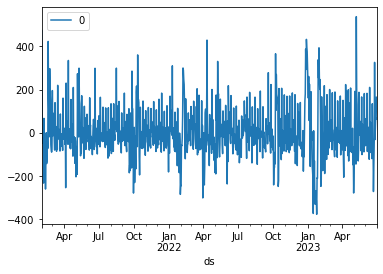

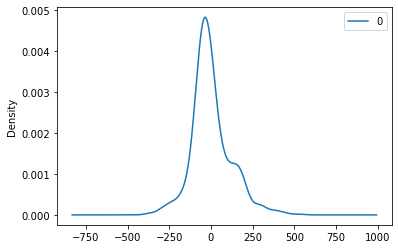

                0
count  880.000000
mean     1.297757
std    118.889638
min   -376.233815
25%    -64.459316
50%    -18.261492
75%     53.670264
max    536.952942


In [1]:
# fit an ARIMA model and plot residual errors
import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('datacount7.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.astype('float32')
train_end_date = '2023-07-01'
train_end_date = pd.to_datetime(train_end_date)
train = series.loc[series.index < train_end_date]
test = series.loc[series.index >= train_end_date]
# fit model
model = ARIMA(train, order=(6,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [2]:
# Predict future values
forecast_steps = 31  # Example: predict 10 future steps
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

2023-07-01    412.452560
2023-07-02    539.153194
2023-07-03    648.600873
2023-07-04    677.031045
2023-07-05    637.519705
2023-07-06    597.004565
2023-07-07    526.445947
2023-07-08    467.987618
2023-07-09    523.792193
2023-07-10    613.997376
2023-07-11    648.505449
2023-07-12    634.748780
2023-07-13    605.443724
2023-07-14    546.721277
2023-07-15    499.479932
2023-07-16    525.276595
2023-07-17    589.537728
2023-07-18    625.555871
2023-07-19    627.356743
2023-07-20    607.889496
2023-07-21    562.816750
2023-07-22    522.735881
2023-07-23    531.556775
2023-07-24    574.735404
2023-07-25    607.780307
2023-07-26    617.864068
2023-07-27    607.097721
2023-07-28    573.867252
2023-07-29    540.462572
2023-07-30    539.369563
2023-07-31    566.871684
Freq: D, Name: predicted_mean, dtype: float64


In [3]:
test

ds
2023-07-01    293.0
2023-07-02    230.0
2023-07-03    739.0
2023-07-04    679.0
2023-07-05    641.0
2023-07-06    592.0
2023-07-07    553.0
2023-07-08    275.0
2023-07-09    235.0
2023-07-10    690.0
2023-07-11    711.0
2023-07-12    633.0
2023-07-13    549.0
2023-07-14    527.0
2023-07-15    329.0
2023-07-16    217.0
2023-07-17    689.0
2023-07-18    684.0
2023-07-19    613.0
2023-07-20    539.0
2023-07-21    508.0
2023-07-22    302.0
2023-07-23    230.0
2023-07-24    687.0
2023-07-25    678.0
2023-07-26    625.0
2023-07-27    572.0
2023-07-28    535.0
2023-07-29    326.0
2023-07-30    248.0
2023-07-31    671.0
Name: y, dtype: float32

In [4]:
df_all = pd.merge(forecast,test,left_index=True, right_index=True)
df_all

,predicted_mean,y
2023-07-01,412.452560,293.0
2023-07-02,539.153194,230.0
2023-07-03,648.600873,739.0
2023-07-04,677.031045,679.0
2023-07-05,637.519705,641.0
2023-07-06,597.004565,592.0
2023-07-07,526.445947,553.0
2023-07-08,467.987618,275.0
2023-07-09,523.792193,235.0
2023-07-10,613.997376,690.0


In [5]:
df_all['gap'] = abs(df_all['predicted_mean'] - df_all['y'])
df_all.dtypes
df_all['predicted_mean'] = df_all['predicted_mean'].astype('int32')
df_all['gap'] = df_all['gap'].astype('int32')

In [6]:
gapsum = df_all['gap'].sum()
sumall = df_all['y'].sum()
percent = gapsum/sumall

In [7]:
percent

0.2158227848101266

In [8]:
gapsum

3410

In [9]:
sumall

15800.0